In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
excel_file_path = "./Result Table (1).xlsx"
mixed_result = pd.read_excel(excel_file_path, sheet_name="cross_dataset")
mixed_result.head(5)

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,22.721628,21.346598,22.721628,21.830528,26.662815
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,17.686695,17.790308,17.686695,18.157267,23.247402
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,17.218540,16.038720,17.218540,16.875702,23.262571
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,20.015371,18.493727,20.015371,18.869516,28.477447
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,18.488050,18.988787,18.488050,19.197340,20.256378


In [3]:
# Only keep the needed columns
sub_mixed_result = mixed_result[["Dataset", "SubjectID", "Martinsson_retrained"]]

In [4]:
demographics = pd.read_excel(excel_file_path, sheet_name="demographics")
demographics.head(5)

,Dataset,Patient_id,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,BMI,HbA1C
0,OhioT1DM,540,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,567,F,20–40,NaN,167.8130,36.87849,0.553600,NaN,PUMP,NaN,NaN
4,OhioT1DM,584,M,40–60,NaN,149.8922,28.71523,0.711924,NaN,PUMP,NaN,NaN


In [5]:
# Merge the dataframes on 'Dataset' and 'SubjectID'/'Patient_id'
merged_df = pd.merge(mixed_result, demographics, left_on=['Dataset', 'SubjectID'], right_on=['Dataset', 'Patient_id'])

# Drop the redundant 'Patient_id' column
merged_df.drop(columns=['Patient_id'], inplace=True)


In [18]:
merged_df

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,...,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,BMI,HbA1C
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,...,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,...,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,...,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,...,F,40–60,NaN,191.8979,27.93472,0.421341,NaN,PUMP,NaN,NaN
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,...,M,40–60,NaN,143.5754,35.86185,0.673276,NaN,PUMP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1DEXI,1683,19.714340,20.566400,19.917330,20.499680,20.03,20.40,21.16,21.27,...,F,20,WHITE,143.7827,30.56774,0.768782,NaN,MDI,NaN,6.1
124,T1DEXI,1689,20.082270,19.722460,20.268260,19.791010,20.31,19.90,20.26,20.00,...,F,50,WHITE,172.7788,26.98128,0.586899,NaN,MDI,NaN,7.1
125,T1DEXI,1695,18.867980,19.286660,18.830070,19.317940,19.06,19.31,19.37,19.82,...,F,25,WHITE,126.2572,25.27653,0.889945,NaN,CLOSED LOOP,NaN,5.4
126,T1DEXI,1722,18.450220,19.413100,18.511040,18.931770,18.76,19.26,19.47,19.53,...,F,29,WHITE,160.0753,29.43964,0.674923,NaN,PUMP,NaN,7.1


In [6]:
from scipy.stats import ttest_ind
# Separate the data based on Gender
male_data = merged_df[merged_df['Gender'] == 'M']['Martinsson_retrained']
female_data = merged_df[merged_df['Gender'] == 'F']['Martinsson_retrained']

# Perform an independent t-test
t_stat, p_value = ttest_ind(male_data, female_data)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("The difference between genders is statistically significant.")
else:
    print("The difference between genders is not statistically significant.")

T-statistic: -2.48552270659215
P-value: 0.014246342490965664
The difference between genders is statistically significant.


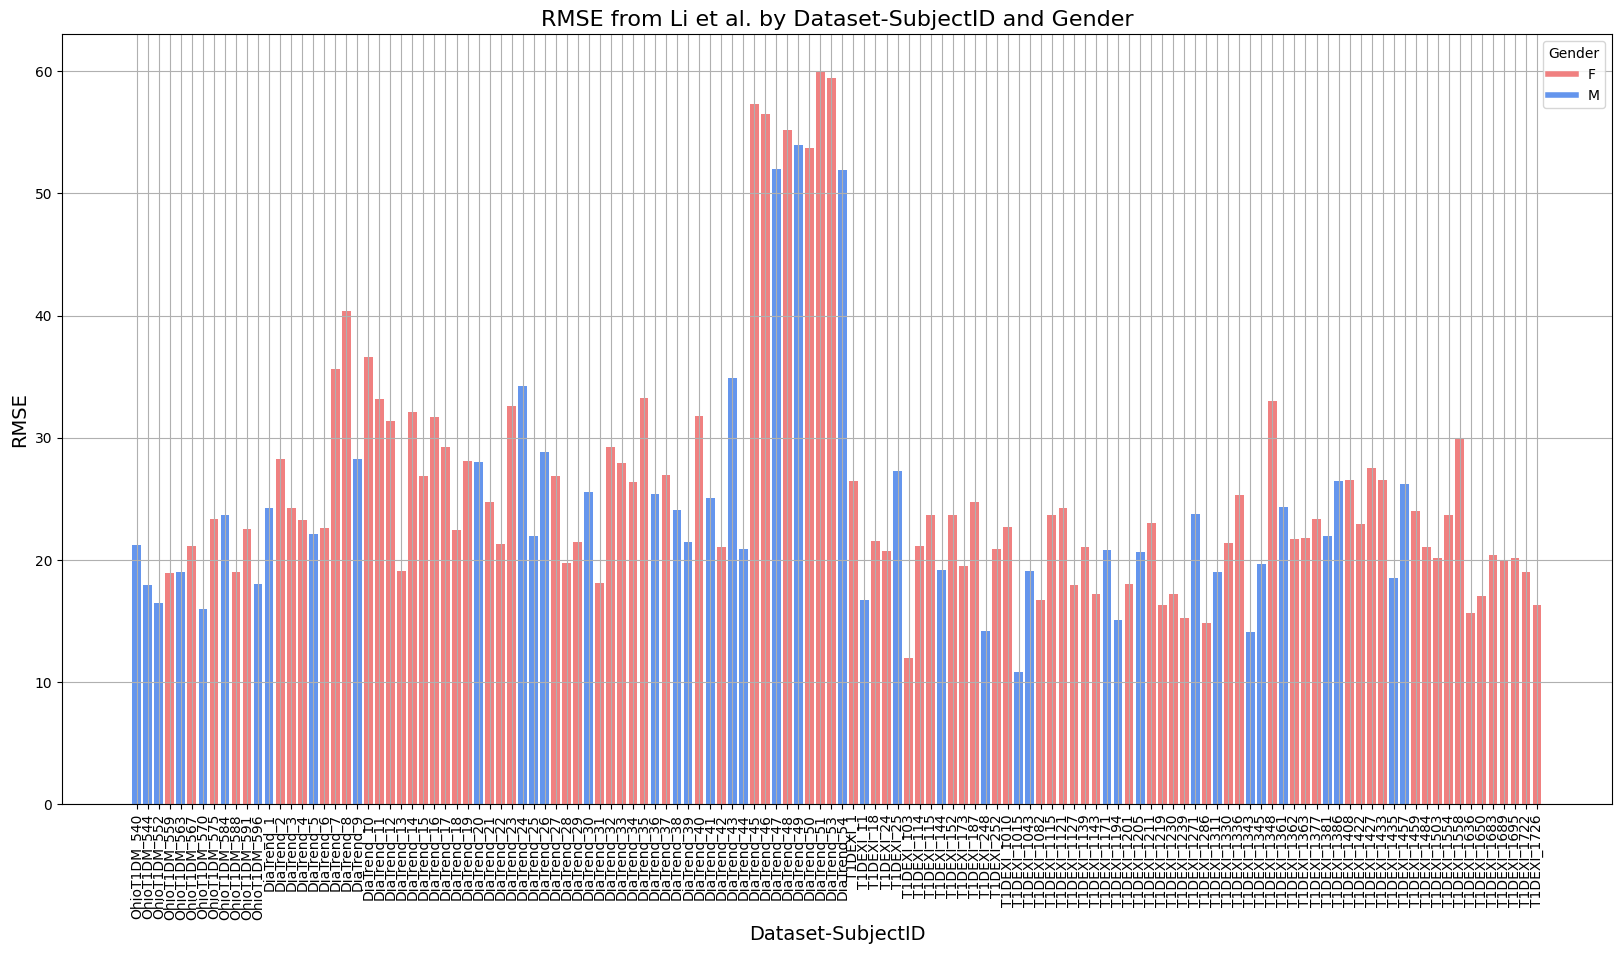

In [62]:
# Create a new column by merging 'Dataset' and 'SubjectID'
merged_df['Dataset_SubjectID'] = merged_df['Dataset'] + '_' + merged_df['SubjectID'].astype(str)

# Define the color map
color_map = {'F': 'lightcoral', 'M': 'cornflowerblue'}

# Sort the dataframe by 'Dataset' and 'SubjectID'
# merged_df.sort_values(by=['Dataset'], inplace=True)

# Create the bar plot
plt.figure(figsize=(20, 10))
bars = plt.bar(merged_df['Dataset_SubjectID'], merged_df['Li_retrained'], color=merged_df['Gender'].map(color_map))

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
labels = color_map.keys()
plt.legend(handles, labels, title='Gender')

plt.xlabel('Dataset-SubjectID', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE from Li et al. by Dataset-SubjectID and Gender', fontsize=16)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\baiyi\AppData\Local\Temp\ipykernel_27000\3707811215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Li_retrained', data=merged_df, palette={'F': 'lightcoral', 'M': 'cornflowerblue'})


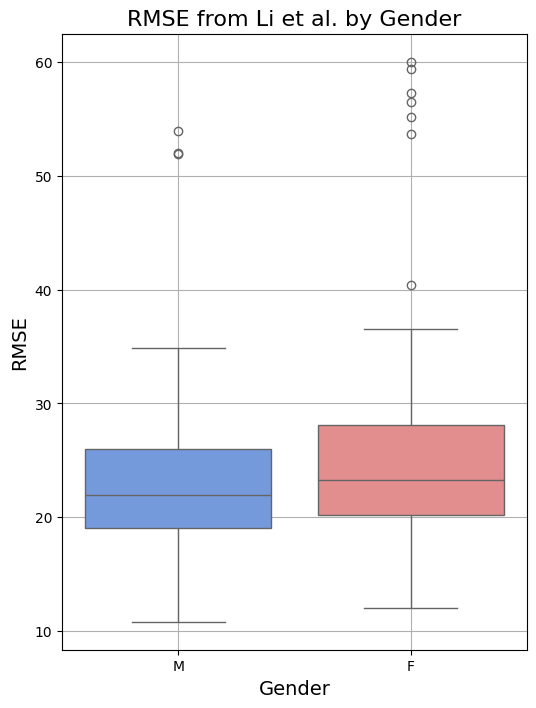

In [61]:
# Create the box plot
plt.figure(figsize=(6, 8))
sns.boxplot(x='Gender', y='Li_retrained', data=merged_df, palette={'F': 'lightcoral', 'M': 'cornflowerblue'})

plt.xlabel('Gender', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE from Li et al. by Gender', fontsize=16)
plt.grid(True)
plt.show()

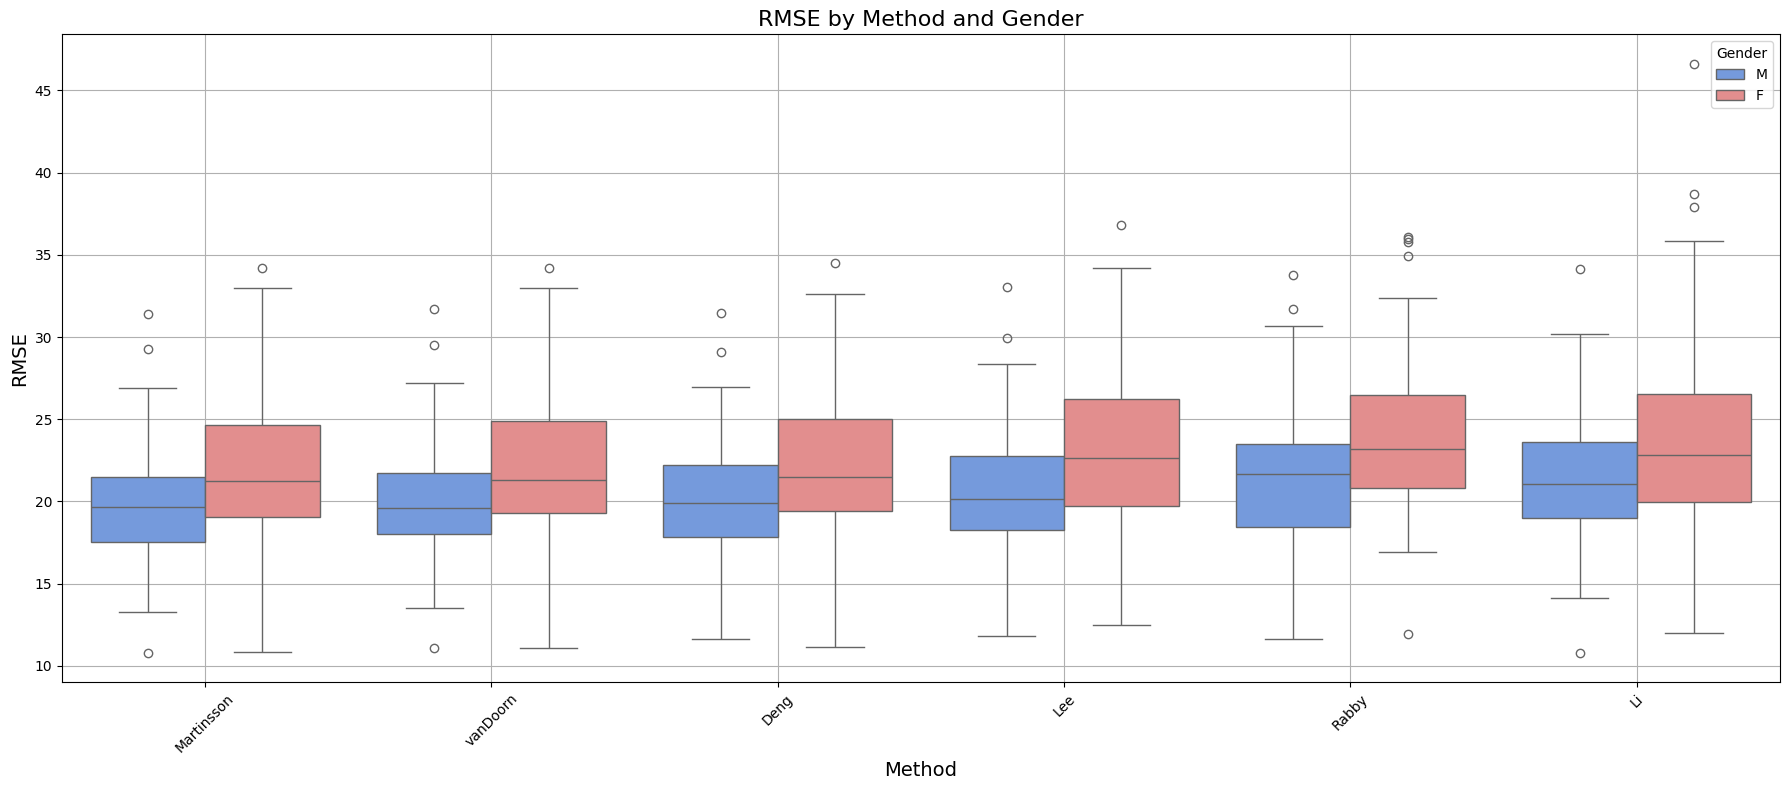

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of methods to plot
methods = ['Martinsson_retrained', 
           'vanDoorn_retrained', 
           'Deng_retrained', 
           'Lee_retrained',
           'Rabby_retrained',
           'Li_retrained']

# Mapping of methods to their display names
method_labels = {
    'Martinsson_retrained': 'Martinsson',
    'vanDoorn_retrained': 'vanDoorn',
    'Deng_retrained': 'Deng',
    'Lee_retrained': 'Lee',
    'Rabby_retrained': 'Rabby',
    'Li_retrained': 'Li'
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = merged_df.melt(id_vars=['SubjectID', 'Gender'], 
                           value_vars=methods, 
                           var_name='Method', value_name='RMSE')

# Replace method names with their display names
melted_df['Method'] = melted_df['Method'].map(method_labels)

# Create the box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Method', y='RMSE', hue='Gender', data=melted_df, 
            palette={'F': 'lightcoral', 'M': 'cornflowerblue'})

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE by Method and Gender', fontsize=16)
plt.grid(True)
plt.legend(title='Gender')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()

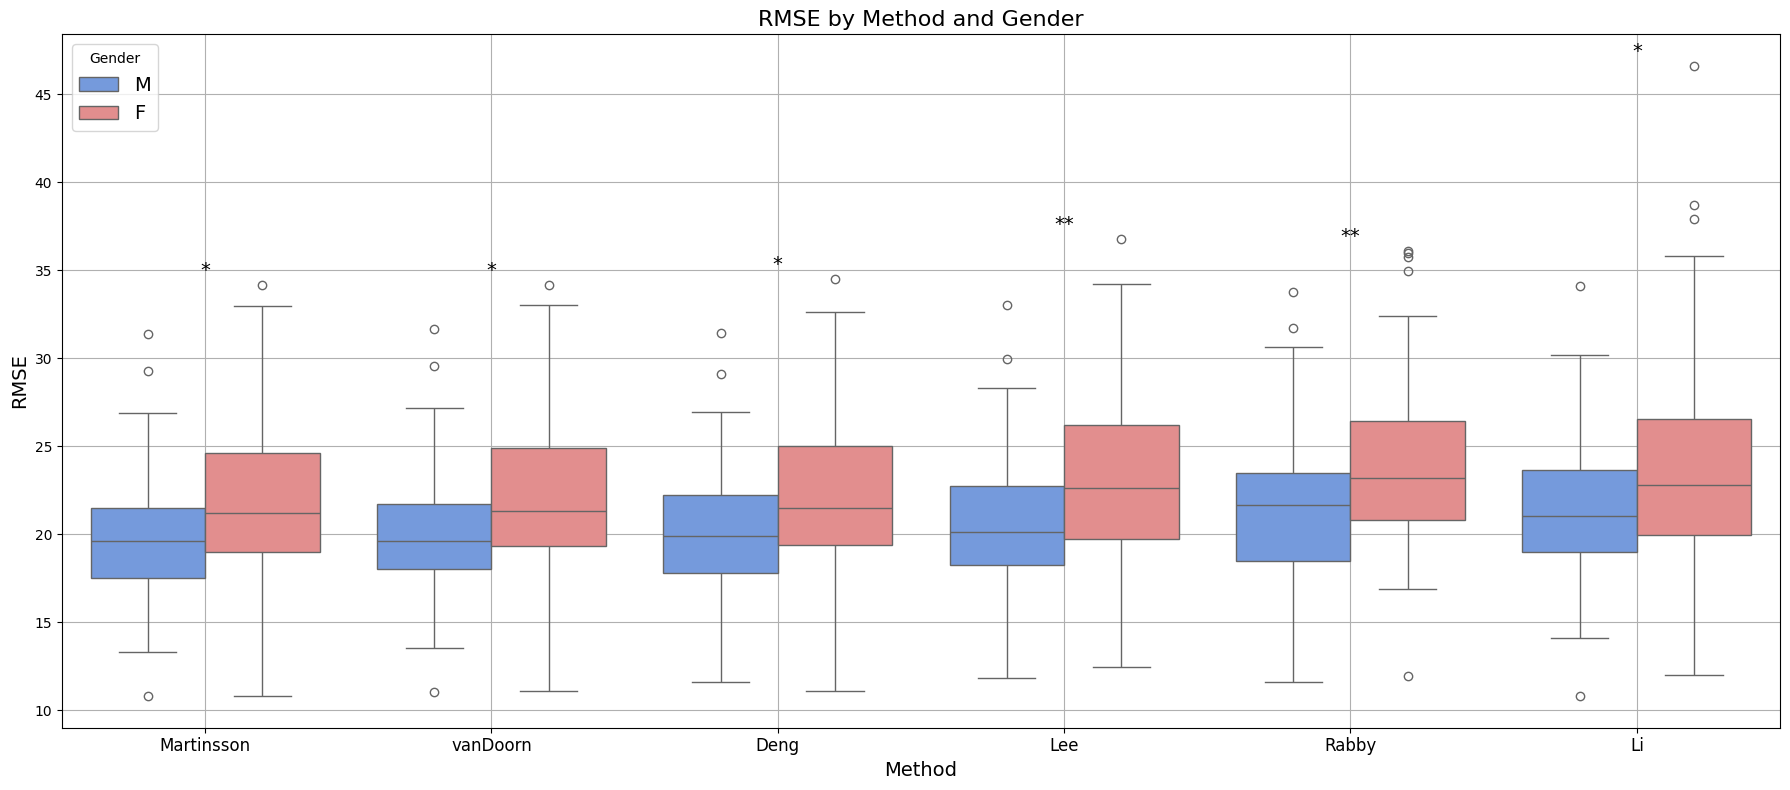

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# List of methods to plot
methods = ['Martinsson_retrained', 
           'vanDoorn_retrained', 
           'Deng_retrained', 
           'Lee_retrained',
           'Rabby_retrained',
           'Li_retrained']

# Mapping of methods to their display names
method_labels = {
    'Martinsson_retrained': 'Martinsson',
    'vanDoorn_retrained': 'vanDoorn',
    'Deng_retrained': 'Deng',
    'Lee_retrained': 'Lee',
    'Rabby_retrained': 'Rabby',
    'Li_retrained': 'Li'
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = merged_df.melt(id_vars=['SubjectID', 'Gender'], 
                           value_vars=methods, 
                           var_name='Method', value_name='RMSE')

# Replace method names with their display names
melted_df['Method'] = melted_df['Method'].map(method_labels)

# Create the box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Method', y='RMSE', hue='Gender', data=melted_df, 
            palette={'F': 'lightcoral', 'M': 'cornflowerblue'})

# Perform t-tests and annotate p-values
for method in method_labels.values():
    male_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'M')]['RMSE']
    female_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'F')]['RMSE']
    t_stat, p_value = ttest_ind(male_rmse, female_rmse)
    
    # Determine the number of stars based on p-value
    if p_value < 0.001:
        stars = '***'
    elif p_value < 0.01:
        stars = '**'
    elif p_value < 0.05:
        stars = '*'
    else:
        stars = 'ns'  # not significant
    
    # Annotate the plot
    plt.text(method, max(male_rmse.max(), female_rmse.max()) + 0.5, stars, 
             horizontalalignment='center', fontsize=14, color='black')

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE by Method and Gender', fontsize=16)
plt.grid(True)
plt.legend(title='Gender', fontsize=14)
plt.xticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

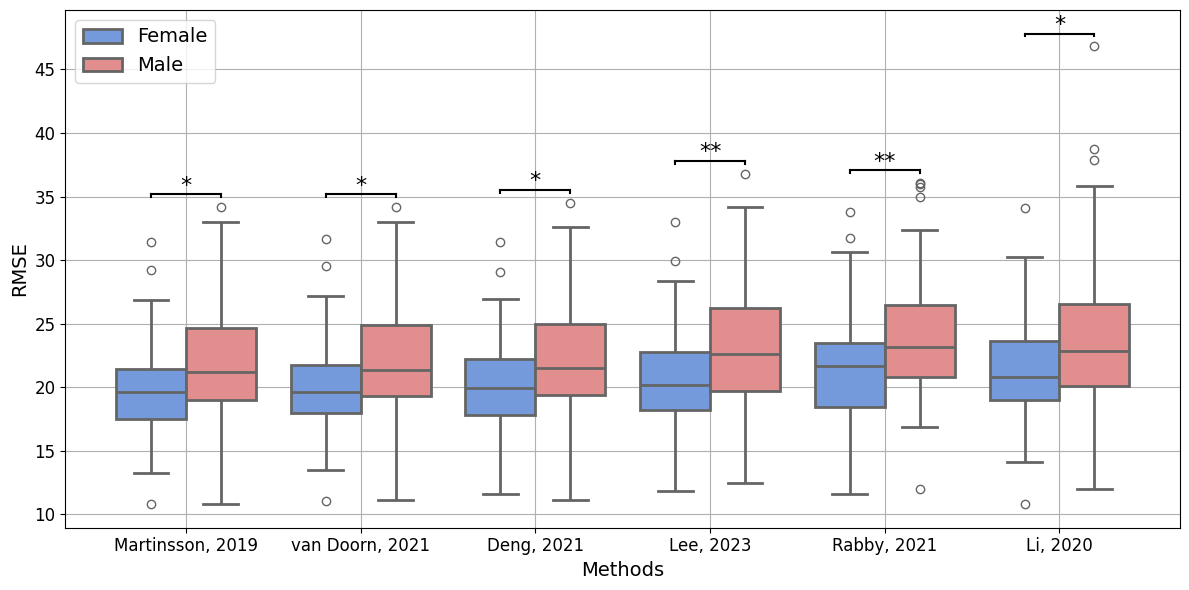

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.patches as patches

# List of methods to plot
methods = ['Martinsson_retrained', 
           'vanDoorn_retrained', 
           'Deng_retrained', 
           'Lee_retrained',
           'Rabby_retrained',
           'Li_retrained']

# Mapping of methods to their display names
method_labels = {
    'Martinsson_retrained': 'Martinsson, 2019',
    'vanDoorn_retrained': 'van Doorn, 2021',
    'Deng_retrained': 'Deng, 2021',
    'Lee_retrained': 'Lee, 2023',
    'Rabby_retrained': 'Rabby, 2021',
    'Li_retrained': 'Li, 2020'
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = merged_df.melt(id_vars=['SubjectID', 'Gender'], 
                           value_vars=methods, 
                           var_name='Method', value_name='RMSE')

# Replace method names with their display names
melted_df['Method'] = melted_df['Method'].map(method_labels)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='RMSE', hue='Gender', data=melted_df, 
            palette={'F': 'lightcoral', 'M': 'cornflowerblue'}, linewidth=2)

# Perform t-tests and annotate p-values
for i, method in enumerate(method_labels.values()):
    male_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'M')]['RMSE']
    female_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'F')]['RMSE']
    t_stat, p_value = ttest_ind(male_rmse, female_rmse)
    
    # Determine the number of stars based on p-value
    if p_value < 0.001:
        stars = '***'
    elif p_value < 0.01:
        stars = '**'
    elif p_value < 0.05:
        stars = '*'
    else:
        stars = 'ns'  # not significant
    
    # Get the maximum y value for the current method
    max_y = max(male_rmse.max(), female_rmse.max())
    
    # Add a rectangle bracket
    plt.plot([i - 0.2, i + 0.2], [max_y + 1, max_y + 1], color='black')
    plt.plot([i - 0.2, i - 0.2], [max_y + 0.8, max_y + 1], color='black')
    plt.plot([i + 0.2, i + 0.2], [max_y + 0.8, max_y + 1], color='black')
    
    # Annotate the plot with stars
    plt.text(i, max_y + 1.2, stars, horizontalalignment='center', fontsize=16, color='black')

# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Female', 'Male'], fontsize=14)
plt.xlabel('Methods', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
# plt.title('RMSE by Method and Gender', fontsize=16)
plt.grid(True)
# plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

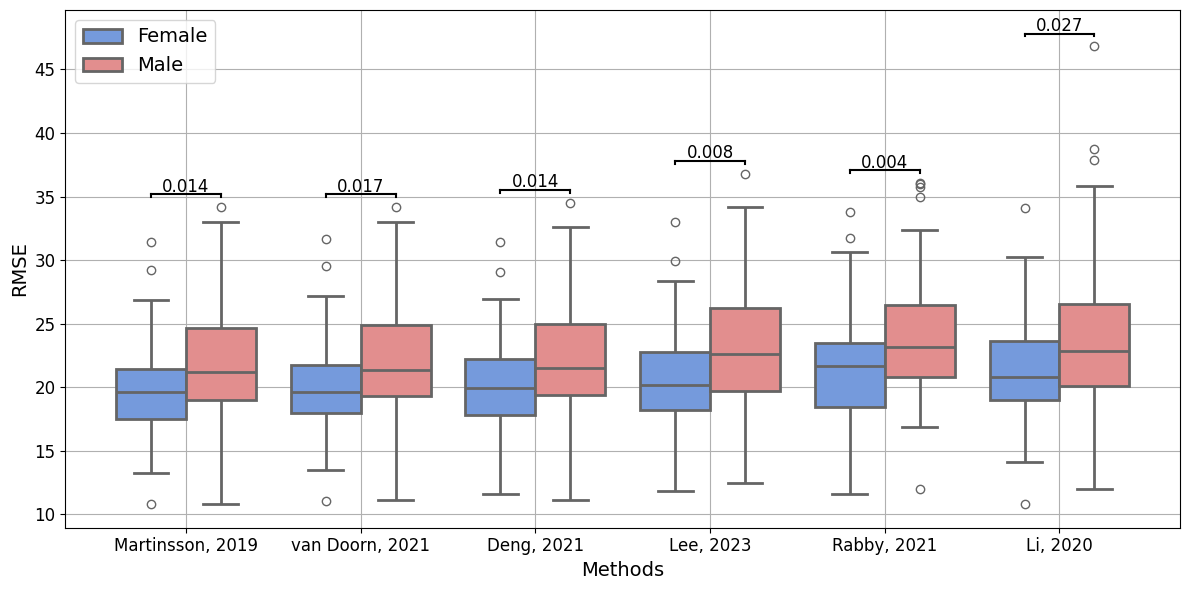

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.patches as patches
# List of methods to plot
methods = ['Martinsson_retrained', 
           'vanDoorn_retrained', 
           'Deng_retrained', 
           'Lee_retrained',
           'Rabby_retrained',
           'Li_retrained']

# Mapping of methods to their display names
method_labels = {
    'Martinsson_retrained': 'Martinsson, 2019',
    'vanDoorn_retrained': 'van Doorn, 2021',
    'Deng_retrained': 'Deng, 2021',
    'Lee_retrained': 'Lee, 2023',
    'Rabby_retrained': 'Rabby, 2021',
    'Li_retrained': 'Li, 2020'
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = merged_df.melt(id_vars=['SubjectID', 'Gender'], 
                           value_vars=methods, 
                           var_name='Method', value_name='RMSE')

# Replace method names with their display names
melted_df['Method'] = melted_df['Method'].map(method_labels)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='RMSE', hue='Gender', data=melted_df, 
            palette={'F': 'lightcoral', 'M': 'cornflowerblue'}, linewidth=2)

# Perform t-tests and annotate p-values
for i, method in enumerate(method_labels.values()):
    male_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'M')]['RMSE']
    female_rmse = melted_df[(melted_df['Method'] == method) & (melted_df['Gender'] == 'F')]['RMSE']
    t_stat, p_value = ttest_ind(male_rmse, female_rmse)
    
    # Get the maximum y value for the current method
    max_y = max(male_rmse.max(), female_rmse.max())
    
    # Add a rectangle bracket
    plt.plot([i - 0.2, i + 0.2], [max_y + 1, max_y + 1], color='black')
    plt.plot([i - 0.2, i - 0.2], [max_y + 0.8, max_y + 1], color='black')
    plt.plot([i + 0.2, i + 0.2], [max_y + 0.8, max_y + 1], color='black')
    
    # Format p-value text
    if p_value < 0.001:
        p_text = 'p < 0.001'
    else:
        p_text = f'{p_value:.3f}'
    
    # Add p-value annotation with smaller font and rotation
    plt.text(i, max_y + 1.2, p_text, 
             horizontalalignment='center', 
             fontsize=12,  # Smaller font size for p-values
             color='black',
             )  # Rotate text for better spacing

# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Female', 'Male'], fontsize=14)
plt.xlabel('Methods', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
# plt.title('RMSE by Method and Gender', fontsize=16)
plt.grid(True)
# plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Check insulin delivery mode

In [13]:
# Count the number of different types of insulin delivery modes
insulin_delivery_counts = demographics['Insulin Delivery Mode'].value_counts()

# Print the results
print(insulin_delivery_counts)

Insulin Delivery Mode
PUMP           88
MDI            23
CLOSED LOOP    17
Name: count, dtype: int64


In [15]:
# Only keep the needed columns
sub_mixed_result = mixed_result[["Dataset", "SubjectID", "Martinsson_retrained"]]
# Merge the dataframes on 'Dataset' and 'SubjectID'/'Patient_id'
merged_df = pd.merge(sub_mixed_result, demographics, left_on=['Dataset', 'SubjectID'], right_on=['Dataset', 'Patient_id'])

# Drop the redundant 'Patient_id' column
merged_df.drop(columns=['Patient_id'], inplace=True)

In [16]:
merged_df

,Dataset,SubjectID,Martinsson_retrained,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,BMI,HbA1C
0,OhioT1DM,540.0,21.352480,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544.0,17.058359,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552.0,16.038330,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559.0,18.618088,F,40–60,NaN,191.8979,27.93472,0.421341,NaN,PUMP,NaN,NaN
4,OhioT1DM,563.0,17.997108,M,40–60,NaN,143.5754,35.86185,0.673276,NaN,PUMP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1DEXI,1683.0,19.714340,F,20,WHITE,143.7827,30.56774,0.768782,NaN,MDI,NaN,6.1
124,T1DEXI,1689.0,20.082270,F,50,WHITE,172.7788,26.98128,0.586899,NaN,MDI,NaN,7.1
125,T1DEXI,1695.0,18.867980,F,25,WHITE,126.2572,25.27653,0.889945,NaN,CLOSED LOOP,NaN,5.4
126,T1DEXI,1722.0,18.450220,F,29,WHITE,160.0753,29.43964,0.674923,NaN,PUMP,NaN,7.1


C:\Users\baiyi\AppData\Local\Temp\ipykernel_22616\1839369813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')


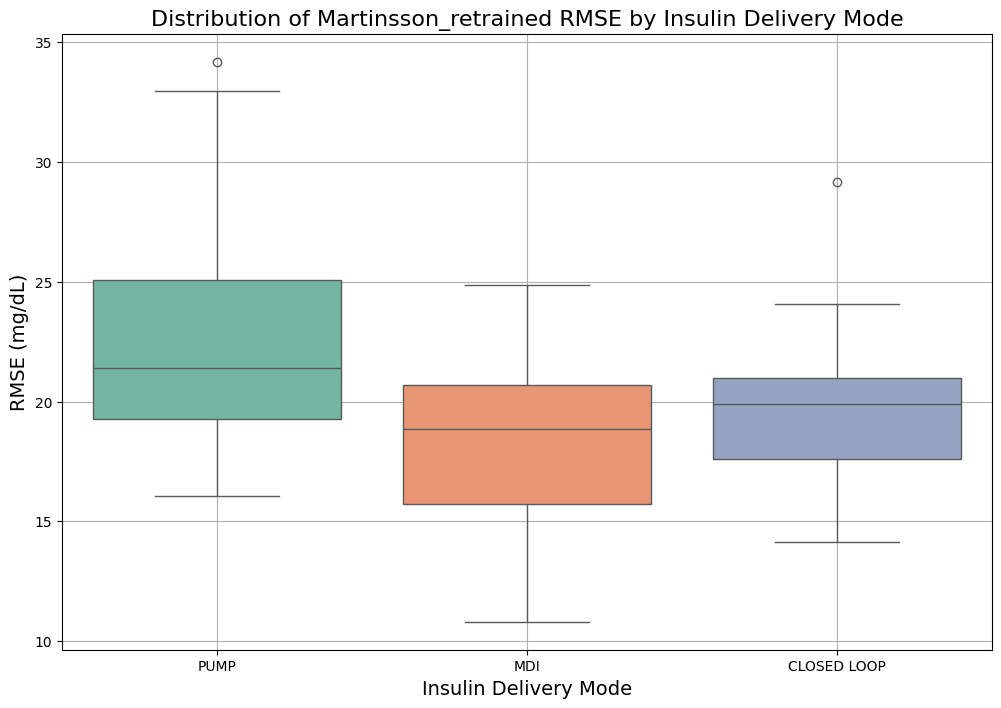

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')
plt.xlabel('Insulin Delivery Mode', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Distribution of Martinsson_retrained RMSE by Insulin Delivery Mode', fontsize=16)
plt.grid(True)
plt.show()

C:\Users\baiyi\AppData\Local\Temp\ipykernel_22616\2687043579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')


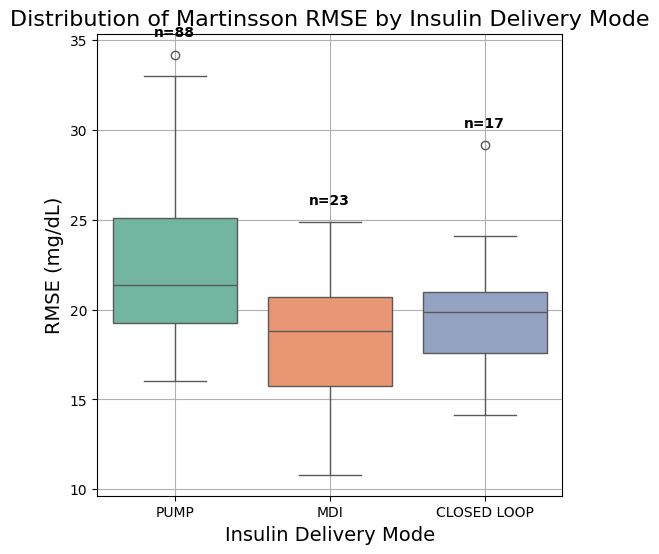

In [20]:
# Plot the figure with narrower canvas and annotations
plt.figure(figsize=(6, 6))
sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')
plt.xlabel('Insulin Delivery Mode', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Distribution of Martinsson RMSE by Insulin Delivery Mode', fontsize=16)
plt.grid(True)

# Annotate the number of patients in each group
group_counts = merged_df['Insulin Delivery Mode'].value_counts()
for i, group in enumerate(group_counts.index):
    count = group_counts[group]
    plt.text(i, merged_df[merged_df['Insulin Delivery Mode'] == group]['Martinsson_retrained'].max() + 1, 
             f'n={count}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

C:\Users\baiyi\AppData\Local\Temp\ipykernel_22616\270007241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')


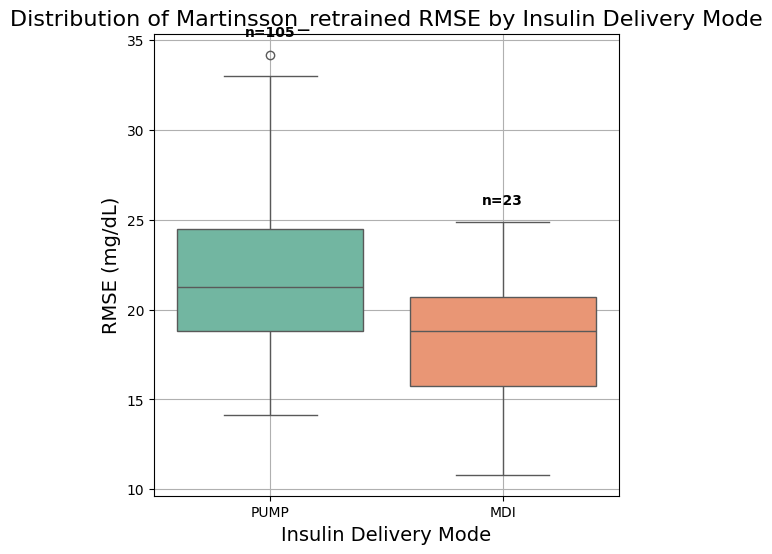

In [25]:
# Combine PUMP and CLOSED_LOOP groups into a single group
merged_df['Insulin Delivery Mode'] = merged_df['Insulin Delivery Mode'].replace({'CLOSED LOOP': 'PUMP'})

# Plot the figure with narrower canvas and annotations
plt.figure(figsize=(6, 6))
sns.boxplot(x='Insulin Delivery Mode', y='Martinsson_retrained', data=merged_df, palette='Set2')
plt.xlabel('Insulin Delivery Mode', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Distribution of Martinsson_retrained RMSE by Insulin Delivery Mode', fontsize=16)
plt.grid(True)

# Annotate the number of patients in each group
group_counts = merged_df['Insulin Delivery Mode'].value_counts()
for i, group in enumerate(group_counts.index):
    count = group_counts[group]
    plt.text(i, merged_df[merged_df['Insulin Delivery Mode'] == group]['Martinsson_retrained'].max() + 1, 
             f'n={count}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

In [23]:
merged_df

,Dataset,SubjectID,Martinsson_retrained,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,BMI,HbA1C
0,OhioT1DM,540.0,21.352480,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544.0,17.058359,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552.0,16.038330,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559.0,18.618088,F,40–60,NaN,191.8979,27.93472,0.421341,NaN,PUMP,NaN,NaN
4,OhioT1DM,563.0,17.997108,M,40–60,NaN,143.5754,35.86185,0.673276,NaN,PUMP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1DEXI,1683.0,19.714340,F,20,WHITE,143.7827,30.56774,0.768782,NaN,MDI,NaN,6.1
124,T1DEXI,1689.0,20.082270,F,50,WHITE,172.7788,26.98128,0.586899,NaN,MDI,NaN,7.1
125,T1DEXI,1695.0,18.867980,F,25,WHITE,126.2572,25.27653,0.889945,NaN,CLOSED LOOP,NaN,5.4
126,T1DEXI,1722.0,18.450220,F,29,WHITE,160.0753,29.43964,0.674923,NaN,PUMP,NaN,7.1


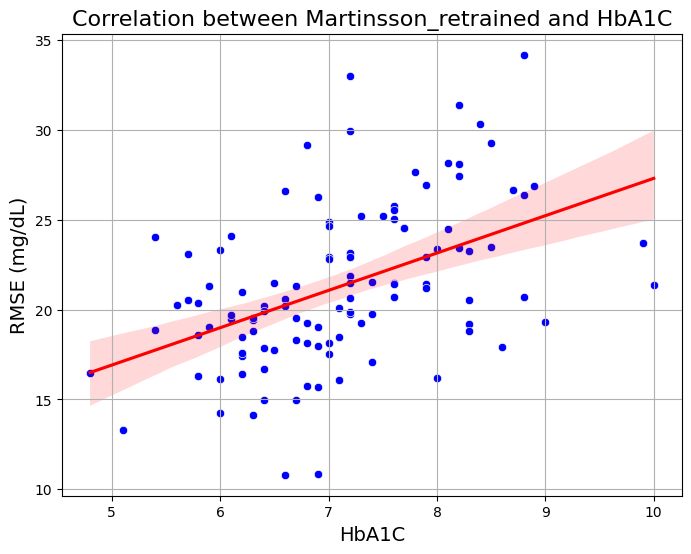

In [26]:
# Filter out rows with NaN values in HbA1C
filtered_df = merged_df.dropna(subset=['HbA1C'])

# Create a scatter plot with a fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, color='blue')
sns.regplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, scatter=False, color='red')
plt.xlabel('HbA1C', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Correlation between Martinsson_retrained and HbA1C', fontsize=16)
plt.grid(True)
plt.show()

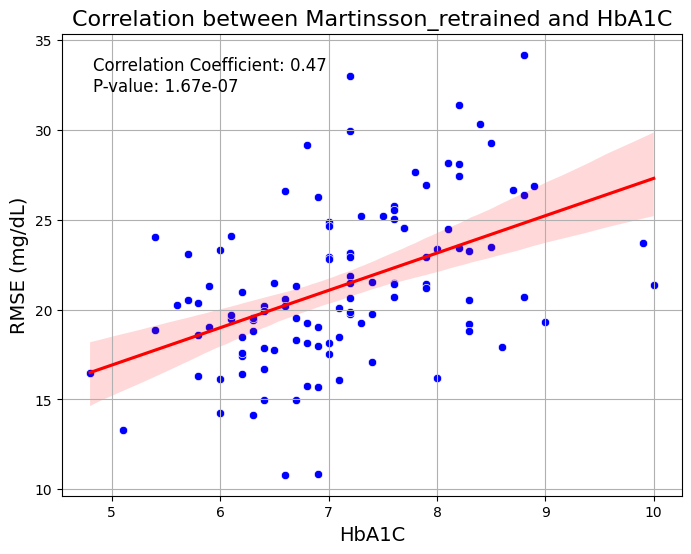

In [28]:
from scipy.stats import pearsonr
# Filter out rows with NaN values in HbA1C
filtered_df = merged_df.dropna(subset=['HbA1C'])

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Martinsson_retrained'])

# Create a scatter plot with a fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, color='blue')
sns.regplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, scatter=False, color='red')
plt.xlabel('HbA1C', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Correlation between Martinsson_retrained and HbA1C', fontsize=16)
plt.grid(True)

# Annotate the correlation coefficient and p-value
plt.text(0.05, 0.95, f'Correlation Coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

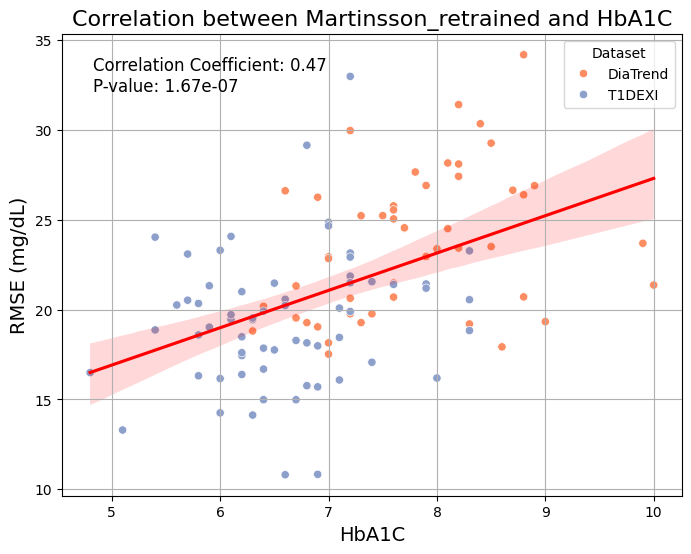

In [7]:
from scipy.stats import pearsonr

filtered_df = merged_df.dropna(subset=['HbA1C'])

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Martinsson_retrained'])

# Define custom colors using the second and third colors from the Set2 palette
custom_palette = {'DiaTrend': sns.color_palette('Set2')[1], 'T1DEXI': sns.color_palette('Set2')[2]}

# Create a scatter plot with a fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HbA1C', y='Martinsson_retrained', hue='Dataset', data=filtered_df, palette=custom_palette)
sns.regplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, scatter=False, color='red')
plt.xlabel('HbA1C', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Correlation between Martinsson_retrained and HbA1C', fontsize=16)
plt.grid(True)

# Annotate the correlation coefficient and p-value
plt.text(0.05, 0.95, f'Correlation Coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

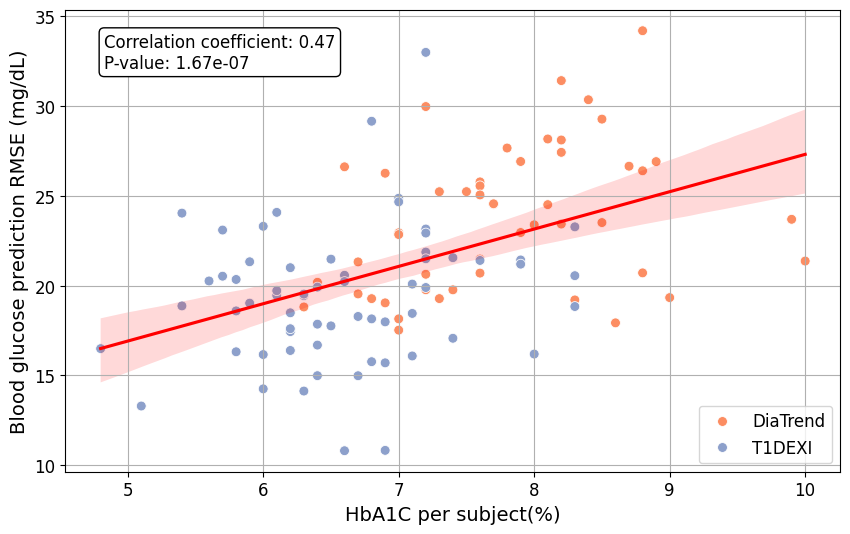

In [10]:
filtered_df = merged_df.dropna(subset=['HbA1C'])
# Define custom colors using the second and third colors from the Set2 palette
custom_palette = {'DiaTrend': sns.color_palette('Set2')[1], 'T1DEXI': sns.color_palette('Set2')[2]}

# Scatter plot for HbA1C & RMSE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HbA1C', y='Martinsson_retrained', hue='Dataset', data=filtered_df, palette=custom_palette, s=50)
sns.regplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Martinsson_retrained'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('HbA1C per subject(%)', fontsize=14)
plt.ylabel('Blood glucose prediction RMSE (mg/dL)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.show()

# BMI and prediction RMSE (T1DEXI only)

In [4]:
height_weight = pd.read_csv('./height_weight.csv')

In [12]:
height_weight['SubjectID']

0         1
1      1000
2      1004
3      1010
4      1012
       ... 
497     979
498     981
499     985
500     987
501     988
Name: SubjectID, Length: 502, dtype: int64

In [10]:
# Only keep the needed columns
sub_mixed_result = mixed_result[["Dataset", "SubjectID", "Martinsson_retrained"]]
t1dexi_result = sub_mixed_result[sub_mixed_result['Dataset'] == 'T1DEXI']

In [11]:
t1dexi_result['SubjectID'] = t1dexi_result['SubjectID'].astype(int)

C:\Users\baiyi\AppData\Local\Temp\ipykernel_30704\449180667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1dexi_result['SubjectID'] = t1dexi_result['SubjectID'].astype(int)


In [13]:
t1dexi_result

,Dataset,SubjectID,Martinsson_retrained
65,T1DEXI,1,24.85944
66,T1DEXI,11,17.43768
67,T1DEXI,18,19.89169
68,T1DEXI,24,20.33968
69,T1DEXI,25,18.83349
...,...,...,...
123,T1DEXI,1683,19.71434
124,T1DEXI,1689,20.08227
125,T1DEXI,1695,18.86798
126,T1DEXI,1722,18.45022


In [19]:
# Merge the DataFrames on SubjectID
merged_df = pd.merge(t1dexi_result, height_weight, on='SubjectID', how='inner')
merged_df

,Dataset,SubjectID,Martinsson_retrained,Height,Weight,Height_Unit,Weight_Unit
0,T1DEXI,1,24.85944,70.0,164.0,inches,lbs
1,T1DEXI,11,17.43768,70.0,152.0,inches,lbs
2,T1DEXI,18,19.89169,66.0,165.0,inches,lbs
3,T1DEXI,24,20.33968,64.0,140.0,inches,lbs
4,T1DEXI,25,18.83349,72.0,175.0,inches,lbs
...,...,...,...,...,...,...,...
58,T1DEXI,1683,19.71434,67.0,178.0,inches,lbs
59,T1DEXI,1689,20.08227,65.0,150.0,inches,lbs
60,T1DEXI,1695,18.86798,65.0,140.0,inches,lbs
61,T1DEXI,1722,18.45022,66.0,145.0,inches,lbs


In [22]:
# Convert height from inches to meters
merged_df['Height_m'] = merged_df['Height'] * 0.0254

# Convert weight from pounds to kilograms
merged_df['Weight_kg'] = merged_df['Weight'] * 0.453592

# Calculate BMI
merged_df['BMI'] = merged_df['Weight_kg'] / (merged_df['Height_m'] ** 2)
merged_df['BMI_another'] = merged_df['Weight'] / (merged_df['Height'] ** 2) * 703


In [23]:
merged_df

,Dataset,SubjectID,Martinsson_retrained,Height,Weight,Height_Unit,Weight_Unit,Height_m,Weight_kg,BMI,BMI_another
0,T1DEXI,1,24.85944,70.0,164.0,inches,lbs,1.7780,74.389088,23.531289,23.528980
1,T1DEXI,11,17.43768,70.0,152.0,inches,lbs,1.7780,68.945984,21.809488,21.807347
2,T1DEXI,18,19.89169,66.0,165.0,inches,lbs,1.6764,74.842680,26.631402,26.628788
3,T1DEXI,24,20.33968,64.0,140.0,inches,lbs,1.6256,63.502880,24.030679,24.028320
4,T1DEXI,25,18.83349,72.0,175.0,inches,lbs,1.8288,79.378600,23.734004,23.731674
...,...,...,...,...,...,...,...,...,...,...,...
58,T1DEXI,1683,19.71434,67.0,178.0,inches,lbs,1.7018,80.739376,27.878432,27.875696
59,T1DEXI,1689,20.08227,65.0,150.0,inches,lbs,1.6510,68.038800,24.961030,24.958580
60,T1DEXI,1695,18.86798,65.0,140.0,inches,lbs,1.6510,63.502880,23.296961,23.294675
61,T1DEXI,1722,18.45022,66.0,145.0,inches,lbs,1.6764,65.770840,23.403353,23.401056


In [26]:
output_file_path = 'merged_df_output.xlsx'
merged_df.to_excel(output_file_path, index=False)

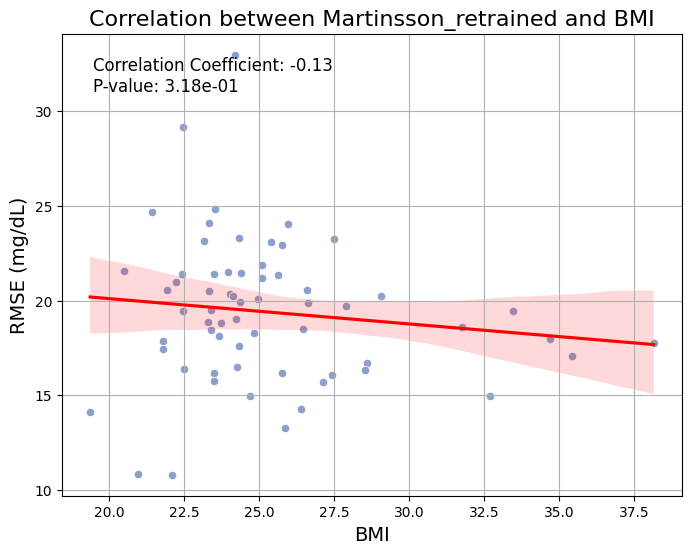

In [25]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(merged_df['BMI'], merged_df['Martinsson_retrained'])

# Create a scatter plot with a fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Martinsson_retrained', data=merged_df, color=sns.color_palette('Set2')[2])
sns.regplot(x='BMI', y='Martinsson_retrained', data=merged_df, scatter=False, color='red')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('Correlation between Martinsson_retrained and BMI', fontsize=16)
plt.grid(True)

# Annotate the correlation coefficient and p-value
plt.text(0.05, 0.95, f'Correlation Coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()